In [14]:
import numpy as np
import matplotlib.pyplot as plt
import gcmotion as gcm

gcm.utils.reload()

plt.style.use("ggplot")
plt.rcParams["figure.dpi"] = 150

%matplotlib inline

### Part 1: Particle Initialization and obrit calculation

In this cell we can create multiple particles independently. By setting cwp (current working particle), we chose the particle to proceed. That way we can keep all previous particles in memory and switch cwp at any point.

First we set up the Tokamak configuration, and the particle's initial conditions

In [15]:
R, a   = 6.2, 2  # Major/Minor Radius in [m]
q      = gcm.qfactor.Hypergeometric(R, a)
Bfield = gcm.bfield.LAR(i=0, g=1, B0=5)
Efield = None#gcm.efield.Radial(R, a, q, Ea=75000, minimum=0.9, waist_width=50)

# Create Particle
species = "p"
mu      = 10e-5  # Magnetic moment
theta0  = np.pi / 3
psi0    = 0.5 #0.39  # 0.4513# times psi_wall
z0      = np.pi
Pz0     = -0.025
tspan   = np.linspace(0, 100000, 10000)  # t0, tf, steps

init_cond = [theta0, psi0, z0, Pz0]

# Particle Creation
Electron1 = gcm.Particle(species, mu, init_cond, tspan, R, a, q, Bfield, Efield)
cwp = Electron1

events = [] #[cwp.events("single_theta_period"), cwp.events("single_theta_period")]
cwp.run(events=events)

animate = False

Constants of motion:
	Particle Energy (normalized):	E  = 9.172341e-05
	Particle Energy (eV):		E  = 6.219190e+03 eV
	Particle Energy (J):		E  = 9.964241e-16 J
	Toroidal Momenta:		Pζ = -0.025

Other Quantities:
	Particle of Species:		"p"
	Orbit Type:			Trapped-Confined
	Major Radius:			R = 6.2 meters
	Minor Radius:			α = 2 meters
	Toroidal Flux at wall:		ψ = 0.0520291
	Time unit:			ω = 4.789417e+08 Hz 
	Energy unit:			E = 1.474845e-08 J 

Orbit calculation time: 0.3102s.


### Part 2: Plots

In [16]:
# cwp.plot.tokamak_profile(zoom = [0.2, 1.1])

In [17]:
#cwp.plot.time_evolution(percentage =10)

### Energy Contour Plots

In [18]:
# cwp.plot.contour_energy(
#     theta_lim = [-np.pi ,np.pi], psi_lim = "auto", 
#     plot_drift=True, contour_Phi = True, units = "keV", levels = 20
# )

## Orbit types parabolas

As for figuring out if the particle is <ins>L</ins>ost or <ins>C</ins>onfined, we need only to check if its orbit point lies in-between the 2 left parabolas.

In [19]:
# cwp.plot.parabolas()
# cwp.plot.orbit_point()

## Torus Poincare map and 3d Torus orbits

Invalid percentage. Plotting the whole thing.


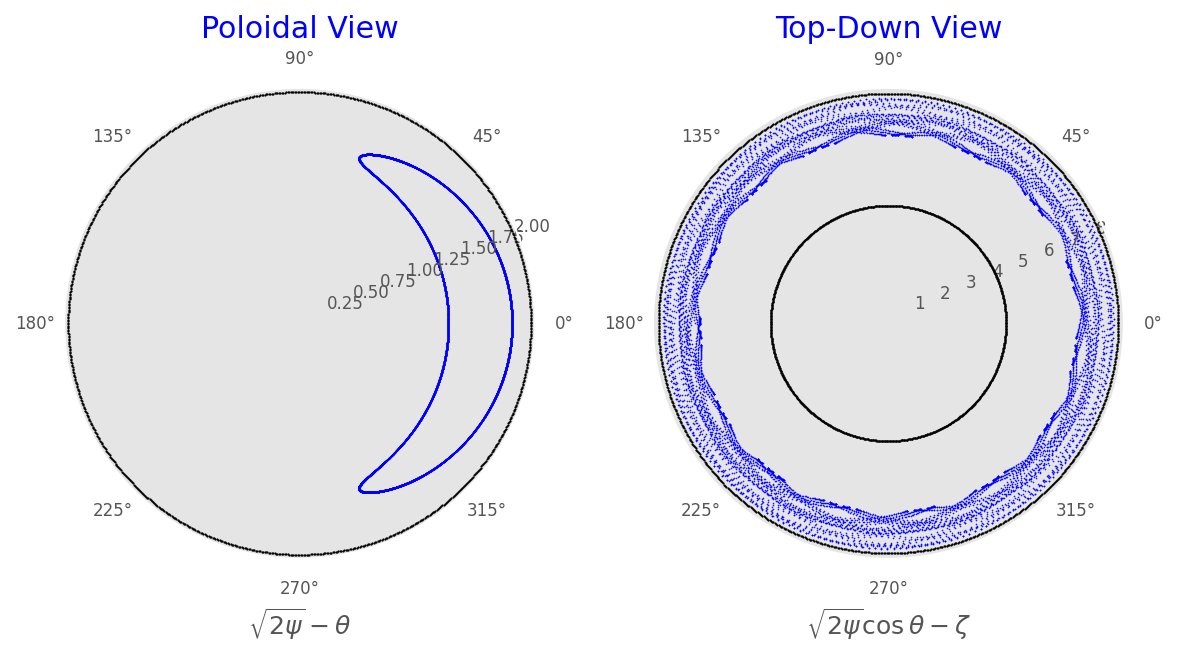

In [20]:
cwp.plot.torus2d(percentage = 200, truescale=True)

In [21]:
# cwp.plot.torus3d(percentage=1000, truescale=True, 
#                 white_background=True, hd=False,)

In [22]:
if animate:
    params = {"percentage": 100, "truescale": True, "min_step": 0.01, "seconds": 300}
    gcm.animate(cwp, params)

## FFT

----------------Running a single period (event locator)----------------

	Calculated θ frequency			= 1.247e+06
	Calculated zeroth ζ frequency		= 1.618e+05
	Calculated ζ fast frequency		= 1.247e+06

Calculation time: 0.0411s.

-----------------------------FFT results-------------------------------

Using trimmed signal.
	Totaling 100 periods, 20 samples each, for a total
	of 20 samples, and a sample rate of 3.969e+06 samples/s.

	Calculated θ frequency			= 1.247e+06
	6 harmonics found: ['1.247e+06Hz', '2.494e+06Hz', '-4.988e+06Hz', '-3.741e+06Hz', '-2.494e+06Hz']

	Sample rate = 3.969e+06 samples/s.
Calculation time: 0.0002s.




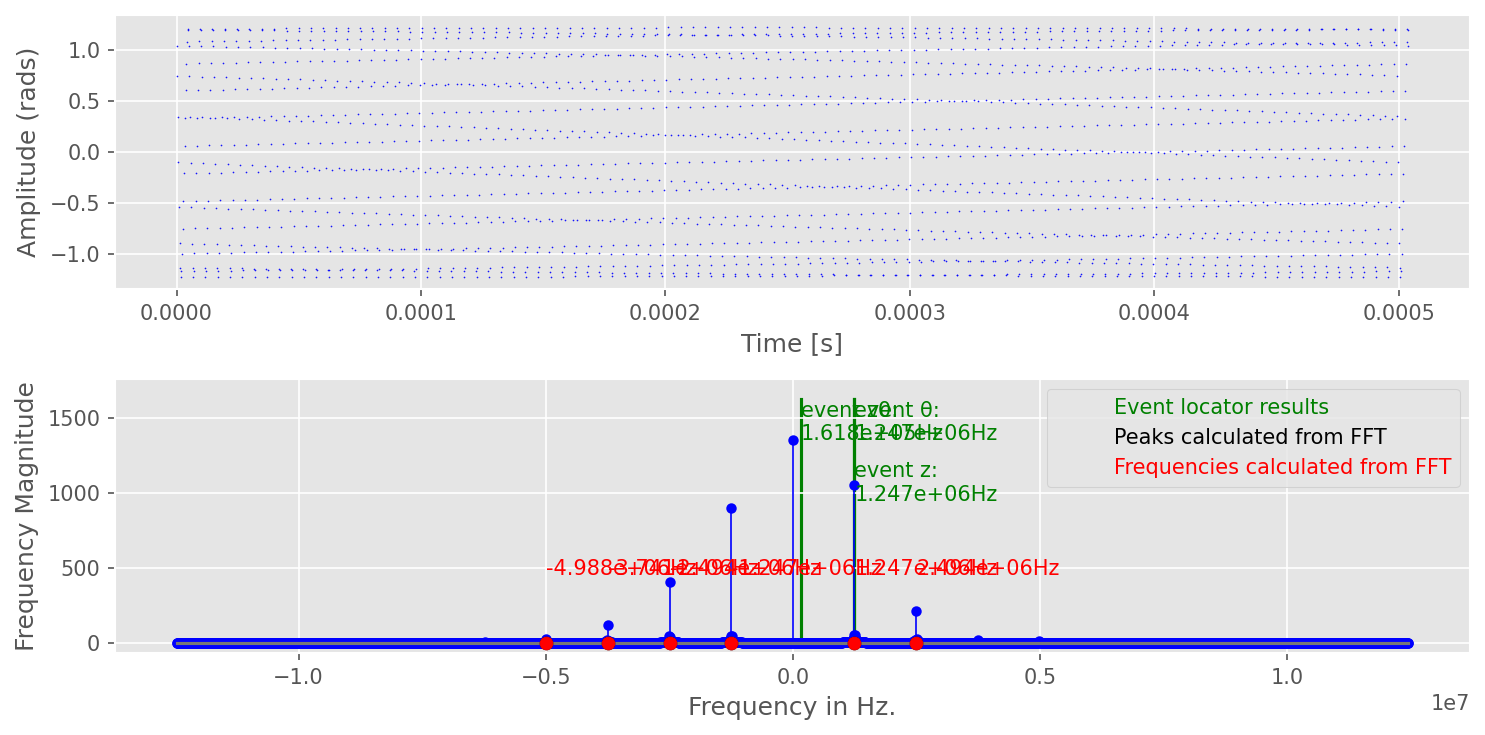

In [23]:
%matplotlib inline 
# replace "inline" with "qt" for interactive

trim_params={"periods":100, "steps_per_period":20}
cwp.freq_analysis(angle="theta", trim_params=trim_params)

----------------Running a single period (event locator)----------------

	Calculated θ frequency			= 1.247e+06
	Calculated zeroth ζ frequency		= 1.618e+05
	Calculated ζ fast frequency		= 1.247e+06

Calculation time: 0.0341s.

-----------------------------FFT results-------------------------------

Using trimmed signal.
	Totaling 1000 periods, 20 samples each, for a total
	of 20 samples, and a sample rate of 3.969e+06 samples/s.

	Calculated z zeroth frequency			= 1.659e+05
	Calculated z fast frequency			= 1.579e+06
	3 harmonics found: ['1.579e+06Hz', '-3.411e+06Hz', '-9.153e+05Hz']

	Sample rate = 3.969e+06 samples/s.
Calculation time: 0.0004s.




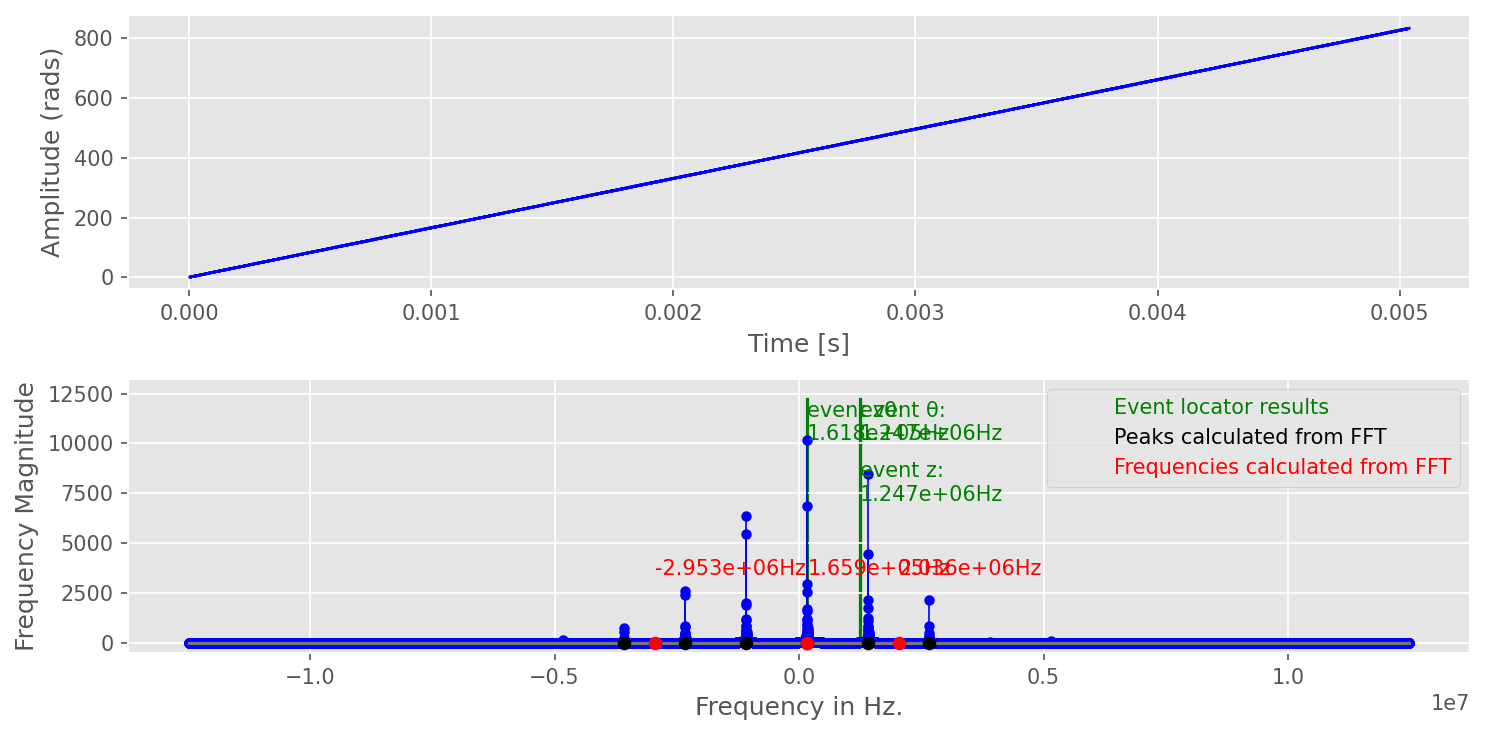

In [24]:
%matplotlib inline
# replace "inline" with "qt" for interactive

trim_params={"periods":1000, "steps_per_period":20}
cwp.freq_analysis(angle="zeta", trim_params={})

#plt.xlim((-4e6, 4e6))